# Case for Cloud Computing

## Free, Open Source
- This is a golden age of awesome, free, open-source software.  
    - Sage
        - Symbolic math
        - Rival to Mathematica
        - Free
        - Mathematica \$310 for 1 basic "Home and Hobby" license
    - Python
        - Numerical
        - Rival to Matlab
        - Free
        - Matlab \$149 for basic (would need \$\$\$ several add-ons to rival Python "scientific stack" )
    - R
        - Statistics
        - Rival to SAS
        - Free
        - I couldn't even get single SAS license price.  Enterprise license $\Uparrow$ \$100,000.        
    - WeBWorK
        - Online homework
        - Rival to Wiley Plus, My Math Lab, etc
        - Free
        - Wiley Plus ~ \$85 per student for my college algebra last summer
    - $\LaTeX$
        - Documentation
        - Rival to MS Word
        - Free (and FAR superior)
    - Others


## Why we should teach with free, open-source
- So students use the skills we teach after they graduate.
    - Many will work for small companies, start their own business, work for NGO's, etc.  No budget for math software (or hardware to run it on).
    - They can use free, open source anywhere, anytime.
- So students can use software at home.
- Open source is now mature.  Free stuff is as good or better than the paid stuff.  And free often improves more rapidly than paid.


## Teaching Challenges
- Teachers must retool
- Implementation


## Implementation Solution - Cloud Computing
- All software and computation done on remote machine
- Your local computer only runs browser.  It can be old and slow.
- Resolves almost all the challenges above
    - Little to no setup time
    - Use anywhere, from any machine (login)
    - We have admin rights to install and update as needed (on the fly - no IT request lag).
    - Installation works the same for everyone (or there maybe no installation at all)

## Cloud Computing Services

[Sage Math Cloud (SMC)][1]
- NO SETUP - just create account and go
- Limited computer resources at free level - paid upgraded services (\$7/month for individual, discounted course pricing)
- Software (all pre-installed, ready to use)
    - Sage
    - Python (and scientific stack)
    - R
    - Latex
    - Gap
    - Maxima
    - Flint
    - SQLite
    - Sphinx
    - and more

[Amazon Web Services Elastic Computing (AWS EC2)][1]
- More setup, more power
- Can load any software
- Many canned "machine images" of commonly used configurations - can reduce setup
- Better for more advanced usera doing more demanding work
    - WeBWorK running AWS
    - Using it for data mining 2

[Google Cloud][3]

[Rackspace][4]

[1]: https://cloud.sagemath.com
[2]: https://aws.amazon.com/ec2/
[3]: https://cloud.google.com/
[4]: https://www.rackspace.com/en-us


## Pros
- Create immediately on demand
- Available anywhere - just login
- Removes IT - doesn't use Tarleton hardware
- Bite-sized \$\$\$ requests - Hardware is expensive, time on AWS is cheap: <https://aws.amazon.com/ec2/pricing/on-demand/>
- "Play" without worry
    - Say you want to try new software, operating system, or configuration
        - Old - Try it on your machine.  If you screw it up, you have to fix it.  Could take days.
        - New - Try it on AWS instance.  If you screw it up, close that instance.  Open a new one.  Try again.  Takes seconds.
    - Like you to get to return the computer and get a new one anytime you mess it up.
- Adjustable
    - AWS - MANY different levels.  Basic ones are cheap, powerful ones cost more.  (Yes, GPUs are available)
    - Develop and test on cheap, basic level.
    - Bump up to powerful level to run "big" job.
    - Go back to cheap level when done.
    - You only pay for the powerful machine when you really need it.
- Marketable skill for our students
    - A *LOT* of companies are moving to cloud computing because it save a lot of money    
    - No guessing about resource requirements
        - Old - Had to guess how much power you might need months before you really know
        - New - Buy more as you need it
    - Less equipment in-house $\to$ fewer IT people in-house $\to$ scientists manage it themselves
    - Thus, companies are looking to hire scientists with training on cloud computing
    
## Cons
- We gotta learn how it use it
- We gotta pay for it
    - All the services have free introductory offers for low-end machines.
    - Different pricing models thereafter
- I have no idea how much to ask for
    - New ideas keep coming
    - Old ideas - no idea how much machine they'll need
    - Dial up-dial down - can't estimate \$\$\$


# An example for Wyatt
Chapter 1: First-order equations, Slope Field for y'=a y, a=2., 1/2, -1, -3 with solutions as in section 1.3 figure 1.3.2

In [1]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x,y): global a; return a*y

avalues=[2., 0.5, -1., -3.]         # DEs of the form y' = a y for these values

def yexact(x,x0,y0):
   global a
   y=y0*exp(a*(x-x0))
   return y

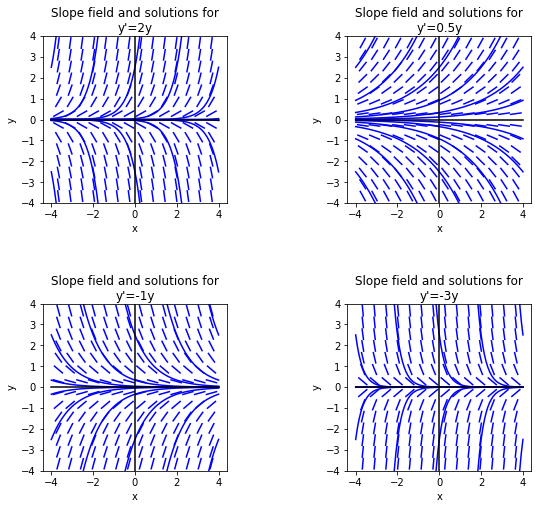

In [3]:
fig = plt.figure(figsize=(10, 8))
#
for k in range(4):
   a = avalues[k]
   ax = fig.add_subplot(2,2,k+1) # ax is the subplot variable for current subplot.
#                                in the 2x2 grid of subplots, this is the k+1'st subplot

   plt.title("Slope field and solutions for\ny'={:g}y".format(a))
#
#                                construct slope field matching fig. 1.3.2
   xmesh=linspace(-3.66,3.66,14); ymesh=linspace(-3.66,3.66,14)
   for xp in xmesh:
      for yp in ymesh:
         m=f(xp,yp)
         h=.25/sqrt(1.+m**2)
         ax.plot([xp-h,xp+h],[yp-m*h,yp+m*h],'b')

#                                solution curves y=y0 exp(a(x-x0))
#                                for selected initial conditions
   for x0 in linspace(-6.,6.,7):
      X=linspace(-4.,4.,101)
      for y0 in linspace(-2.5,2.5,2):
         Y=yexact(X,x0,y0)
         ax.plot(X,Y,'b',linewidth=1.5)
   ax.plot([-4.,4.],[0.,0.],'k')          # a line for the x-axis
   ax.plot([0.,0.],[-4.,4.],'k')          # a line for the y-axis
   ax.set_xlabel('x'); ax.set_ylabel('y')
   ax.set_aspect(1.0)                     # appropriate for square subplots
   ax.set_ylim([-4., 4.])                 # plot only portions of solution curves within these limits
#                                            (otherwise the autoscaling produes tall narrow plots)

# adjust spacing between subplots so labels from top row do not overwrite titles in bottom row
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.60)
plt.savefig("306ch1_slope_fields_solns_1.3.2.png")
plt.show()